In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
#data_in = dirname + "da_data_repo/cps-earnings/clear/"
#data_out = dirname + "da_case_studies/ch09-gender-age-earnings/"
output = dirname + "da_case_studies/ch07-ols-simulation/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions 
from py_helper_functions import *

In [9]:
# set the seed
np.random.seed=1458
# sample size
n = 100

In [23]:
# uniformly distributed x, [0,4]
xvar=np.random.uniform(0,4,n)

In [24]:
# y  = a + bx + u (u normally distributed)
a=2
b=0.5
sigmau=0.7
yvar=a+b*xvar+np.random.normal(0,sigmau,size=n)

In [27]:
ols=pd.DataFrame({'yvar':yvar,'xvar':xvar})

In [28]:
reg=smf.ols(formula='yvar~xvar',data=ols).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yvar   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.393
No. Observations:                 100   F-statistic:                     65.07
Covariance Type:            nonrobust   Prob (F-statistic):           1.83e-12
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1143      0.141     15.010      0.000       1.835       2.394
xvar           0.4841      0.060      8.067      0.000       0.365       0.603
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

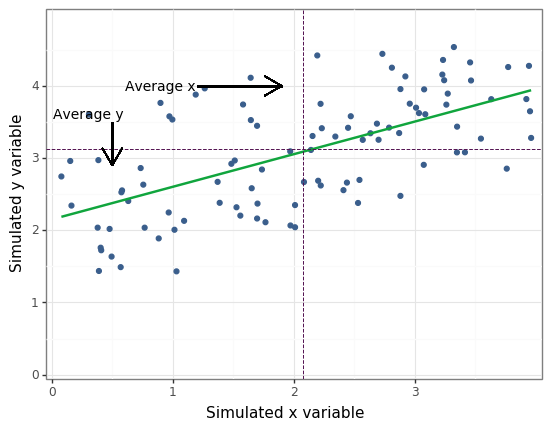

<ggplot: (8758083530903)>

In [38]:
ggplot(ols, aes(x="xvar", y="yvar")) + geom_point(color=color[0]) + geom_smooth(
    color=color[1], se=False, method="lm"
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 4), breaks=seq(0, 4, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 5), breaks=seq(0, 5, by=1)
) + labs(
    x="Simulated x variable", y="Simulated y variable"
) + theme_bw() + geom_vline(
    xintercept=np.mean(xvar), color=color[2], linetype="dashed", size=0.4
) + geom_hline(
    yintercept=np.mean(yvar), color=color[2], linetype="dashed", size=0.4
) + geom_segment(
    aes(x=0.5, y=3.5, xend=0.5, yend=2.9), arrow=arrow()
) + annotate(
    "text", x=0.3, y=3.6, label="Average y", size=10
) + geom_segment(
    aes(x=1.2, y=4, xend=1.9, yend=4), arrow=arrow()
) + annotate(
    "text", x=0.9, y=4, label="Average x", size=10
)